 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\whale_returns.csv')
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date")

In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\algo_returns.csv')
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date")

In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\sp500_history.csv')
# YOUR CODE HERE
sp500_returns = pd.read_csv(sp500_history_csv, parse_dates= ["Date"])


In [9]:
sp500_returns["Date"] = sp500_returns["Date"].dt.strftime('%Y-%m-%d')
sp500_returns = sp500_returns.set_index("Date")
sp500_returns = sp500_returns.sort_index()
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [10]:
# Check Data Types
# YOUR CODE HERE
sp500_returns.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_returns.pct_change()

In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns = {"Close": "S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis= "columns", join="inner" )
joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='% Return'>

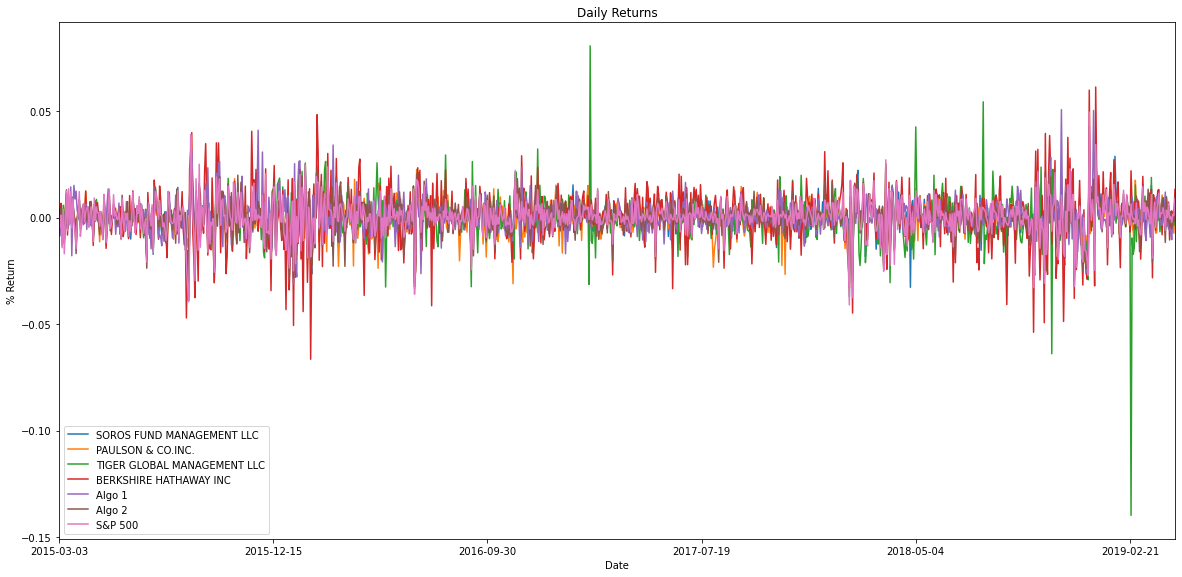

In [16]:
# Plot daily returns
# YOUR CODE HERE
joined_df.plot(title="Daily Returns", ylabel="% Return", xlim=(0,1042), figsize=(20,9.5))

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

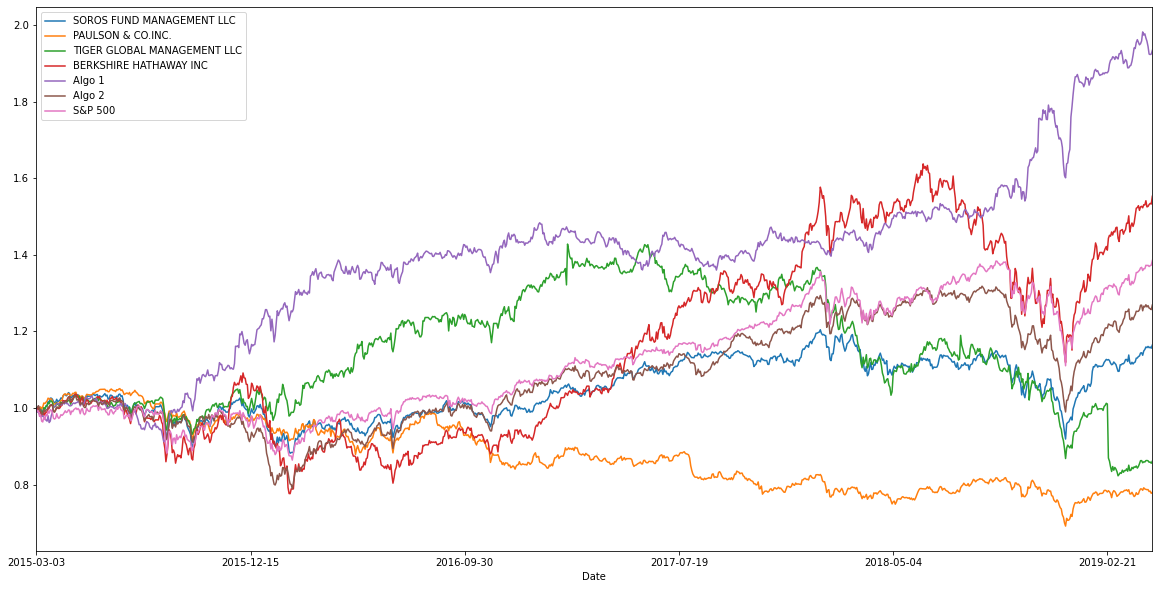

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.plot(xlim=(0,1042), figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}, ylabel='Daily Return %'>

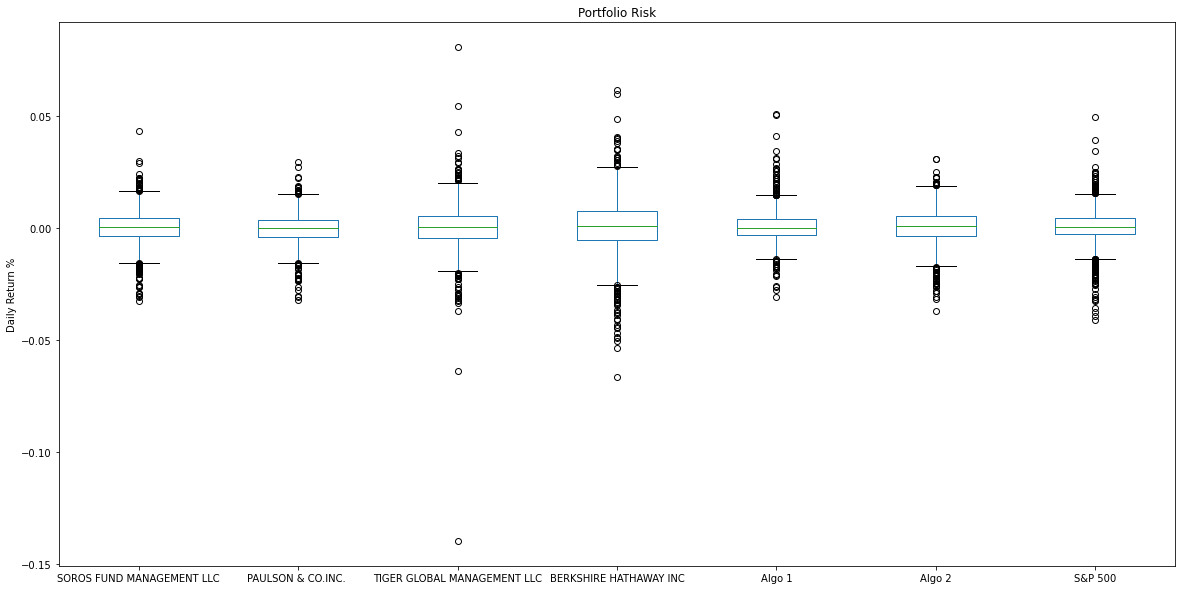

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
joined_df.plot.box(title="Portfolio Risk", ylabel= "Daily Return %", figsize=(20,10))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = joined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std.gt(daily_std.loc["S&P 500"])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

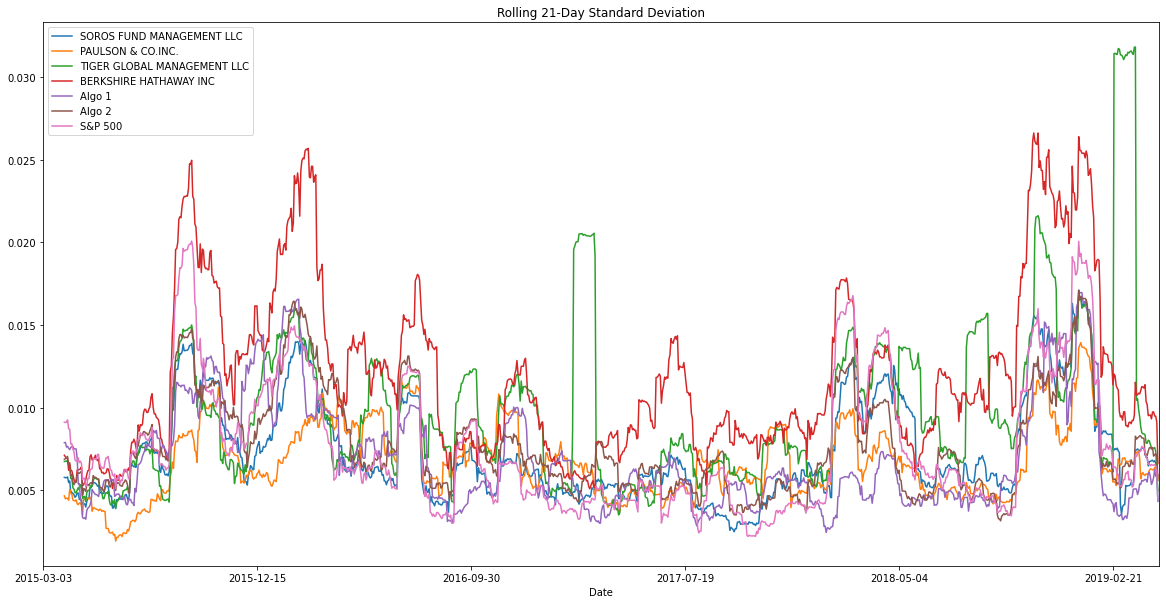

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_21 = joined_df.rolling(21).std()
rolling_21.plot(title="Rolling 21-Day Standard Deviation", xlim=(0,1043), figsize=(20,10))

In [23]:
# Construct a correlation table
# YOUR CODE HERE
correlation = joined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Berkshire Hathaway Inc Rolling Beta'}, xlabel='Date'>

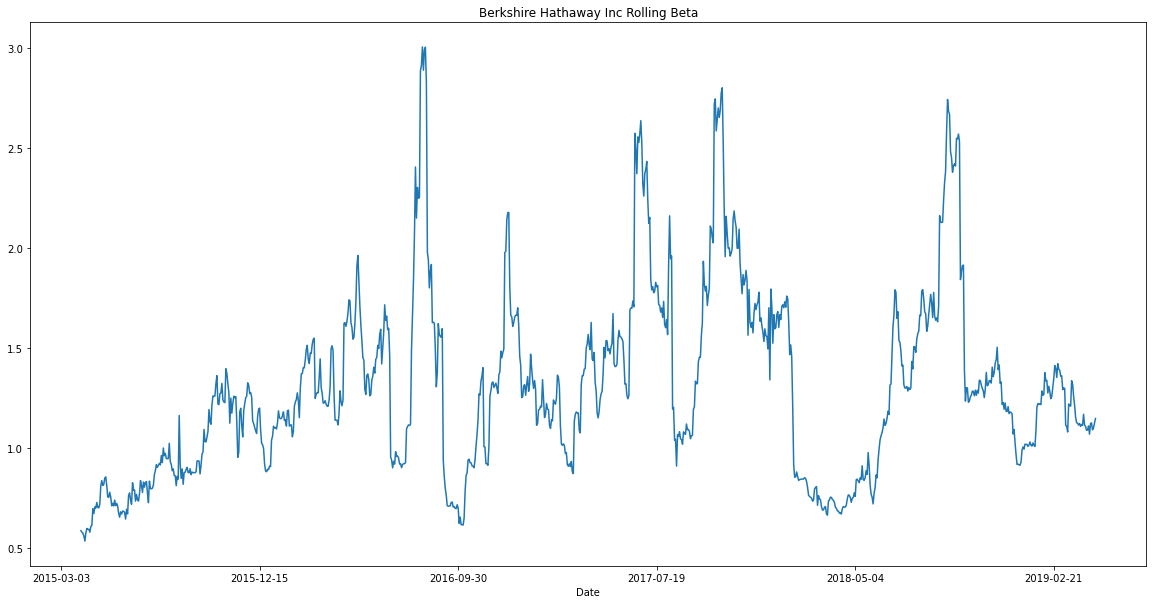

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
beta = (rolling_21["BERKSHIRE HATHAWAY INC"] / rolling_21["S&P 500"]) * correlation["BERKSHIRE HATHAWAY INC"]["S&P 500"]
beta.plot(title="Berkshire Hathaway Inc Rolling Beta", figsize=(20,10))

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

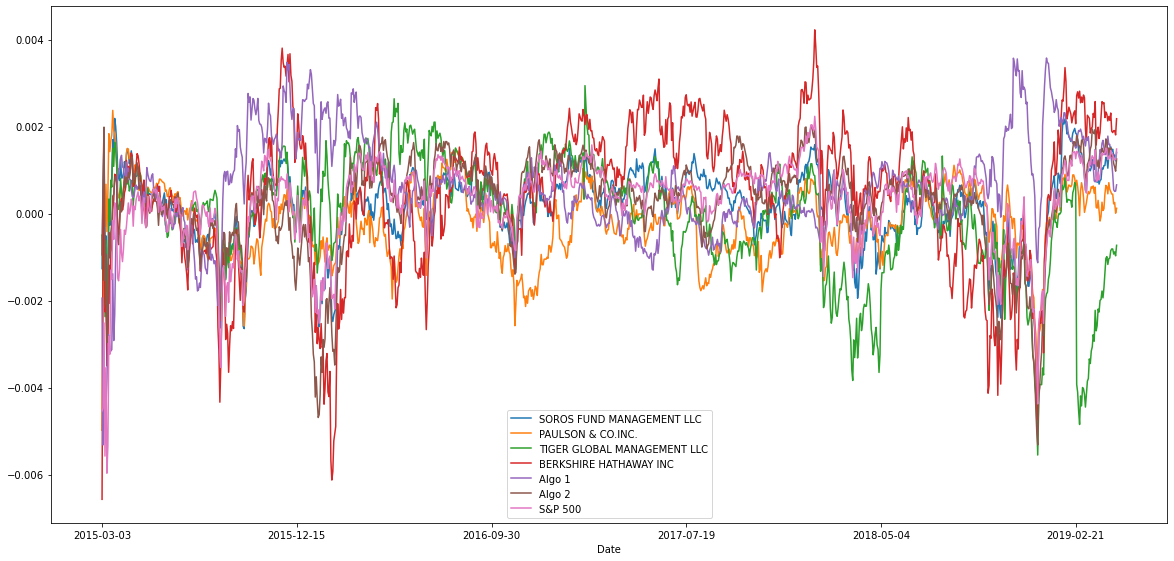

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
joined_ewm = joined_df.ewm(halflife=21).mean()
joined_ewm.plot(figsize=(20,9.5))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

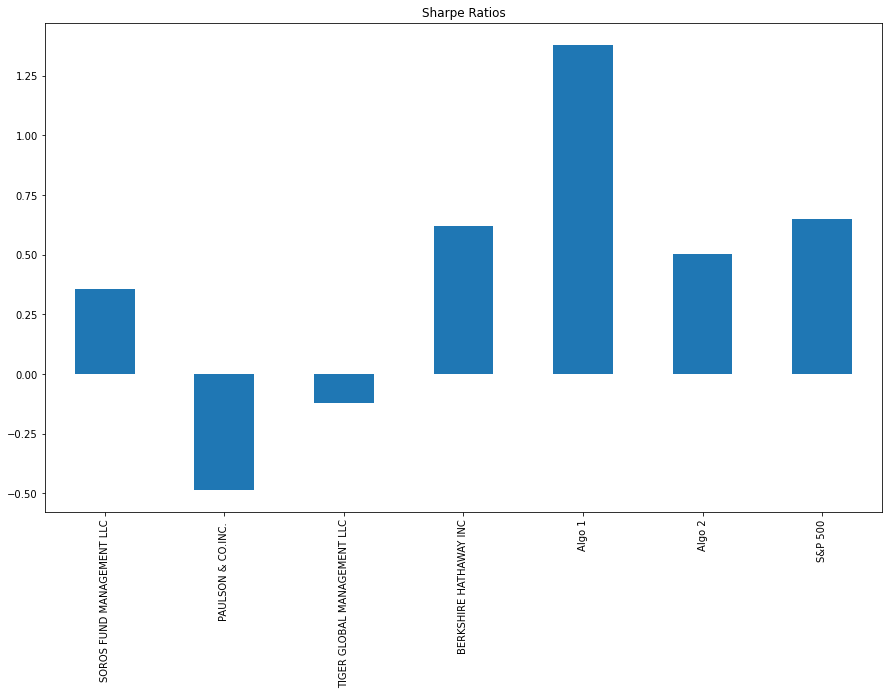

In [29]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=(15,9))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Based on sharpe ratio Algo 1 ***outperforms*** all the whales ***and*** the benchmark.  Algo 2 outperforms all whales ***except*** Berkshire Hathaway and ***underperforms*** the benchmark.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Read the first stock
# YOUR CODE HERE
baba_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\BABA.csv')
baba_prices = pd.read_csv(baba_csv)
baba_prices["Symbol"] = "BABA"
baba_prices = baba_prices[["Date", "Symbol", "Close"]]

In [46]:
# Read the second stock
jnj_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\JNJ.csv')
jnj_prices = pd.read_csv(jnj_csv)
jnj_prices["Symbol"] = "JNJ"
jnj_prices = jnj_prices[["Date", "Symbol", "Close"]]

In [47]:
# Read the third stock
# YOUR CODE HERE
hlt_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\HLT.csv')
hlt_prices = pd.read_csv(hlt_csv)
hlt_prices["Symbol"] = "HLT"
hlt_prices = hlt_prices[["Date", "Symbol", "Close"]]

In [48]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_pfo_joined = pd.concat([baba_prices, jnj_prices, hlt_prices], axis="rows", join="inner")
my_pfo_joined

,Date,Symbol,Close
0,2018-10-01,BABA,162.00
1,2018-10-02,BABA,160.23
2,2018-10-03,BABA,162.37
3,2018-10-04,BABA,156.13
4,2018-10-05,BABA,154.63
...,...,...,...
501,2020-09-28,HLT,89.06
502,2020-09-29,HLT,86.60
503,2020-09-30,HLT,85.32
504,2020-10-01,HLT,87.22


In [49]:
# Reset the index
# YOUR CODE HERE
my_pfo_joined = my_pfo_joined.set_index("Date")

In [50]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
my_pfo_joined = my_pfo_joined.pivot(columns="Symbol", values="Close")
my_pfo_joined

Symbol,BABA,HLT,JNJ
Date,,,
2018-10-01,162.00,78.39,139.69
2018-10-02,160.23,77.08,140.48
2018-10-03,162.37,76.55,139.03
2018-10-04,156.13,75.41,139.35
2018-10-05,154.63,74.38,139.10
...,...,...,...
2020-09-28,276.01,89.06,147.11
2020-09-29,276.93,86.60,147.06
2020-09-30,293.98,85.32,148.88


In [51]:
# Drop Nulls
# YOUR CODE HERE
my_pfo_joined = my_pfo_joined.dropna()
my_pfo_joined.isnull().sum()

Symbol
BABA    0
HLT     0
JNJ     0
dtype: int64

In [53]:
# Calculate Percentage Returns
# YOUR CODE HERE
my_pfo_returns = my_pfo_joined.pct_change().drop(my_pfo_joined.index[0])
my_pfo_returns

Symbol,BABA,HLT,JNJ
Date,,,
2018-10-02,-0.010926,-0.016711,0.005655
2018-10-03,0.013356,-0.006876,-0.010322
2018-10-04,-0.038431,-0.014892,0.002302
2018-10-05,-0.009607,-0.013659,-0.001794
2018-10-08,-0.022570,0.007663,0.002085
...,...,...,...
2020-09-28,0.018149,0.036425,0.009955
2020-09-29,0.003333,-0.027622,-0.000340
2020-09-30,0.061568,-0.014781,0.012376


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_return = my_pfo_returns.dot(weights)
weighted_return

Date
2018-10-02   -0.007327
2018-10-03   -0.001281
2018-10-04   -0.017007
2018-10-05   -0.008353
2018-10-08   -0.004274
                ...   
2020-09-28    0.021510
2020-09-29   -0.008209
2020-09-30    0.019721
2020-10-01   -0.000526
2020-10-02   -0.001776
Length: 505, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
super_pfo = pd.concat([joined_df, weighted_return], axis="columns", join="inner")
super_pfo.rename(columns = {0:"Custom"}, inplace = True)
super_pfo

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-10-02,0.001562,0.005214,0.001470,-0.009741,0.001833,-0.006589,-0.000397,-0.007327
2018-10-03,0.002575,0.001456,-0.003772,0.002983,-0.000526,0.006670,0.000711,-0.001281
2018-10-04,-0.010206,-0.008663,-0.004069,-0.027458,0.000144,-0.013089,-0.008170,-0.017007
2018-10-05,-0.010609,-0.004303,-0.000684,-0.015004,-0.003506,-0.007022,-0.005528,-0.008353
2018-10-08,-0.003268,-0.000671,0.013890,-0.008058,-0.004040,-0.005825,-0.000395,-0.004274
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008521
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.002909
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.005504


In [56]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
super_pfo = super_pfo.dropna()
super_pfo.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [62]:
# Risk
# YOUR CODE HERE
super_pfo_std = super_pfo.std()
super_pfo_std

SOROS FUND MANAGEMENT LLC      0.011134
PAULSON & CO.INC.              0.008779
TIGER GLOBAL MANAGEMENT LLC    0.017179
BERKSHIRE HATHAWAY INC         0.018291
Algo 1                         0.010237
Algo 2                         0.010671
S&P 500                        0.011792
Custom                         0.014164
dtype: float64

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

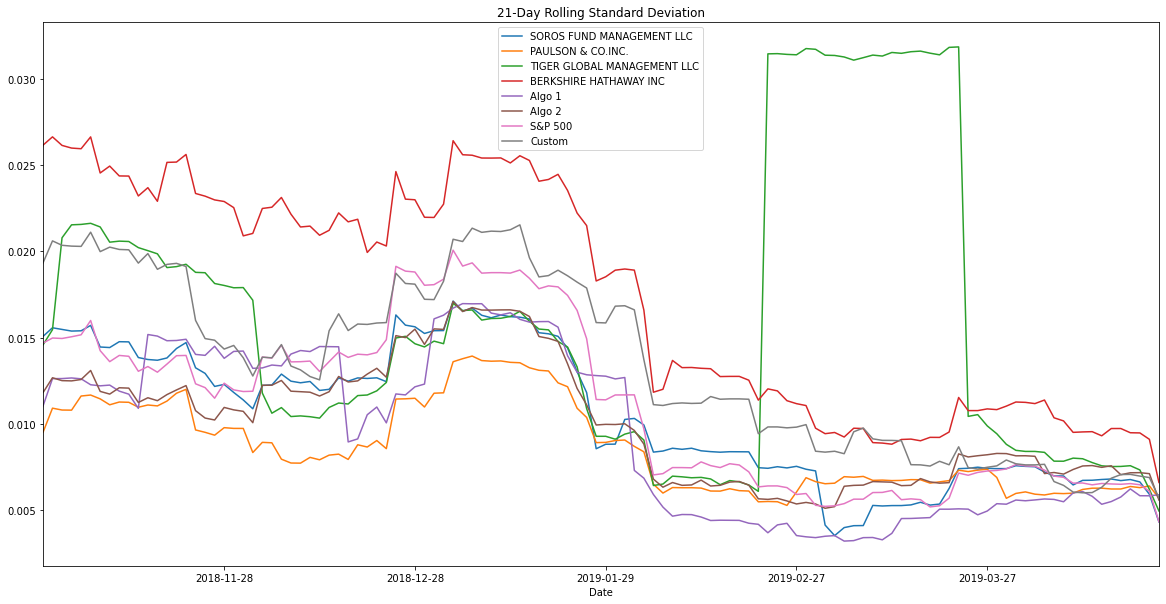

In [71]:
# Rolling
# YOUR CODE HERE
super_pfo_rolling_21= super_pfo.rolling(21).std()
super_pfo_rolling_21.plot(title="21-Day Rolling Standard Deviation", xlim=(21,138), figsize=(20,10))

In [72]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
super_sharpe_ratios = (super_pfo.mean() * 252) / (super_pfo.std() * np.sqrt(252))
super_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.368309
PAULSON & CO.INC.             -0.468403
TIGER GLOBAL MANAGEMENT LLC   -1.498672
BERKSHIRE HATHAWAY INC         0.595171
Algo 1                         2.350432
Algo 2                        -0.148505
S&P 500                        0.122982
Custom                         0.902723
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

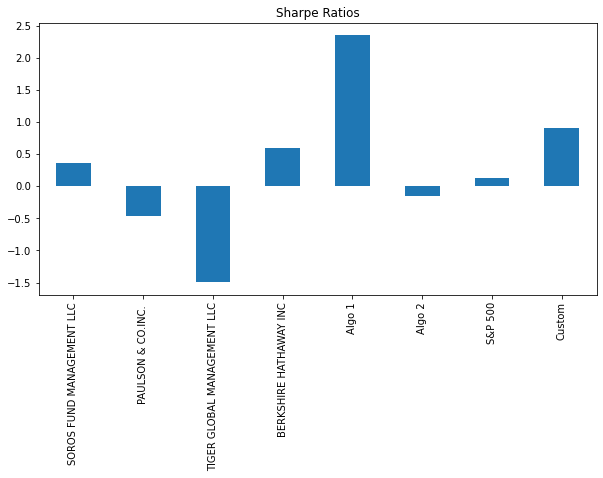

In [74]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
super_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

In [75]:
# Create a correlation analysis
# YOUR CODE HERE
super_correlation = super_pfo.corr()
super_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.818800,0.488955,0.856647,0.396308,0.884079,0.896824,0.781918
PAULSON & CO.INC.,0.818800,1.000000,0.477375,0.705215,0.440674,0.828477,0.791994,0.680359
TIGER GLOBAL MANAGEMENT LLC,0.488955,0.477375,1.000000,0.351660,0.166953,0.403400,0.486220,0.321690
BERKSHIRE HATHAWAY INC,0.856647,0.705215,0.351660,1.000000,0.397908,0.824380,0.886177,0.875026
Algo 1,0.396308,0.440674,0.166953,0.397908,1.000000,0.443676,0.346369,0.359205
Algo 2,0.884079,0.828477,0.403400,0.824380,0.443676,1.000000,0.894643,0.795218
S&P 500,0.896824,0.791994,0.486220,0.886177,0.346369,0.894643,1.000000,0.854048
Custom,0.781918,0.680359,0.321690,0.875026,0.359205,0.795218,0.854048,1.000000


C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Custom Pfo Rolling Beta vs. S&P 500'}, xlabel='Date'>

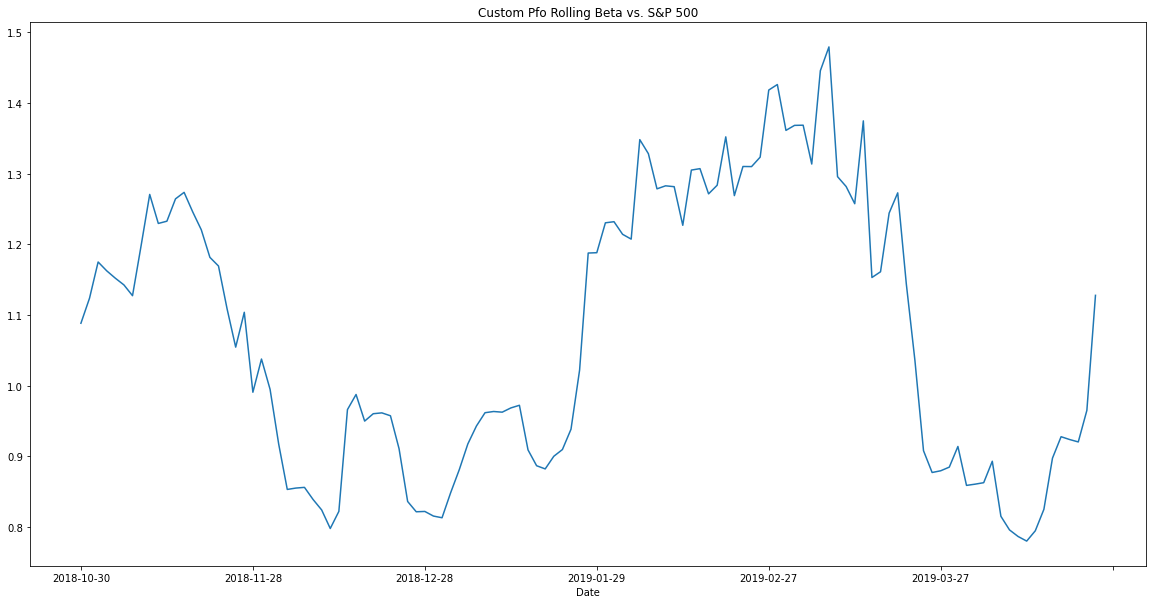

In [77]:
# Beta
# YOUR CODE HERE
super_beta = (super_pfo_rolling_21["Custom"] / super_pfo_rolling_21["S&P 500"]) * super_correlation["Custom"]["S&P 500"]
super_beta.plot(title="Custom Pfo Rolling Beta vs. S&P 500", figsize=(20,10))